In [1]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.unet_model import UNetModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 

json_file = "configs/unet_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

accuracy: dice_coeff
batch_size: 2
checkpoint_dir: ./experiments\unet_kittiroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: unet_kittiroad
final_model_dir: ./experiments\unet_kittiroad\saved_model/
image_size:
- 320
- 480
- 3
learning_rate: 0.00023949513325777832
loss: bce_dice_loss
max_to_keep: 5
num_epochs: 5
num_iter_per_epoch: 50
summary_dir: ./experiments\unet_kittiroad\summary/



Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (578, 320, 480, 3)
Size of masks collection :  (578, 320, 480)


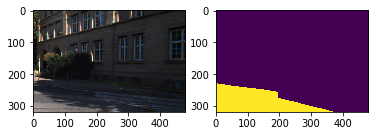

In [2]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("train_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [3]:
# tf.reset_default_graph()

# model = UNetModel(config)
# model.build()

In [15]:
graph = tf.Graph()
with graph.as_default():
    with tf.Session() as sess:   
        tf.saved_model.loader.load(sess, [tf.saved_model.tag_constants.TRAINING], config.final_model_dir)    
        bl = sess.run("best_loss/best_loss:0")
        print(bl)        
        for op in graph.get_operations():
            print(op.name)
            
        X_test = graph.get_tensor_by_name("inputs/X:0")
        out_pred =  graph.get_tensor_by_name("output")
        
        test = [data.get_data_element("test_data",i) for i in range(5)]
        for item in test :
            img = item[0]
            mask = item[1]

            output_pred = sess.run(out_pred,feed_dict={X_test : [img]})
            segmentation = (output_pred>0.5).reshape(self.height,self.width,1)
            mask = np.dot(segmentation, np.array([[0, 255, 0, 127]]))
            mask = scipy.misc.toimage(mask, mode="RGBA")
            street_im = scipy.misc.toimage(img)
            street_im.paste(mask, box=None, mask=mask)
            plt.imshow(street_im)
            plt.show()
#     trainer.train()
#     test = [data.get_data_element("test_data",i) for i in range(2)]
#     for item in test :
#         img = item[0]
#         mask = item[1]
#         model.predict(sess,img,mask)

INFO:tensorflow:Restoring parameters from ./experiments\unet_kittiroad\saved_model/variables\variables
0.4498321
global_step/global_step/initial_value
global_step/global_step
global_step/global_step/Assign
global_step/global_step/read
cur_epoch/cur_epoch/initial_value
cur_epoch/cur_epoch
cur_epoch/cur_epoch/Assign
cur_epoch/cur_epoch/read
cur_epoch/add/y
cur_epoch/add
cur_epoch/Assign
save/Const
save/SaveV2/tensor_names
save/SaveV2/shape_and_slices
save/SaveV2
save/control_dependency
save/RestoreV2/tensor_names
save/RestoreV2/shape_and_slices
save/RestoreV2
save/Assign
save/Assign_1
save/restore_all
best_loss/best_loss/initial_value
best_loss/best_loss
best_loss/best_loss/Assign
best_loss/best_loss/read
best_loss/Placeholder
best_loss/Assign
Placeholder
inputs/X
inputs/y
conv1_0/kernel/Initializer/random_uniform/shape
conv1_0/kernel/Initializer/random_uniform/min
conv1_0/kernel/Initializer/random_uniform/max
conv1_0/kernel/Initializer/random_uniform/RandomUniform
conv1_0/kernel/Initial

conv6_1/BiasAdd
conv6_1/Relu
u7_0/kernel/Initializer/random_uniform/shape
u7_0/kernel/Initializer/random_uniform/min
u7_0/kernel/Initializer/random_uniform/max
u7_0/kernel/Initializer/random_uniform/RandomUniform
u7_0/kernel/Initializer/random_uniform/sub
u7_0/kernel/Initializer/random_uniform/mul
u7_0/kernel/Initializer/random_uniform
u7_0/kernel
u7_0/kernel/Assign
u7_0/kernel/read
u7_0/bias/Initializer/zeros
u7_0/bias
u7_0/bias/Assign
u7_0/bias/read
u7_0/Shape
u7_0/strided_slice/stack
u7_0/strided_slice/stack_1
u7_0/strided_slice/stack_2
u7_0/strided_slice
u7_0/strided_slice_1/stack
u7_0/strided_slice_1/stack_1
u7_0/strided_slice_1/stack_2
u7_0/strided_slice_1
u7_0/strided_slice_2/stack
u7_0/strided_slice_2/stack_1
u7_0/strided_slice_2/stack_2
u7_0/strided_slice_2
u7_0/mul/y
u7_0/mul
u7_0/mul_1/y
u7_0/mul_1
u7_0/stack/3
u7_0/stack
u7_0/conv2d_transpose
u7_0/BiasAdd
concatenate_1/concat/axis
concatenate_1/concat
dropout_5/Identity
conv7_0/kernel/Initializer/random_uniform/shape
conv7_

train/gradients/train/add_3_grad/Sum
train/gradients/train/add_3_grad/Reshape
train/gradients/train/add_3_grad/Sum_1
train/gradients/train/add_3_grad/Reshape_1
train/gradients/train/add_3_grad/tuple/group_deps
train/gradients/train/add_3_grad/tuple/control_dependency
train/gradients/train/add_3_grad/tuple/control_dependency_1
train/gradients/train/Mean_grad/Shape
train/gradients/train/Mean_grad/Size
train/gradients/train/Mean_grad/add
train/gradients/train/Mean_grad/mod
train/gradients/train/Mean_grad/Shape_1
train/gradients/train/Mean_grad/range/start
train/gradients/train/Mean_grad/range/delta
train/gradients/train/Mean_grad/range
train/gradients/train/Mean_grad/Fill/value
train/gradients/train/Mean_grad/Fill
train/gradients/train/Mean_grad/DynamicStitch
train/gradients/train/Mean_grad/Maximum/y
train/gradients/train/Mean_grad/Maximum
train/gradients/train/Mean_grad/floordiv
train/gradients/train/Mean_grad/Reshape
train/gradients/train/Mean_grad/Tile
train/gradients/train/Mean_grad/S

train/gradients/train/sub_1_grad/tuple/control_dependency
train/gradients/train/sub_1_grad/tuple/control_dependency_1
train/gradients/AddN_2
train/gradients/train/clip_by_value_grad/Shape
train/gradients/train/clip_by_value_grad/Shape_1
train/gradients/train/clip_by_value_grad/Shape_2
train/gradients/train/clip_by_value_grad/zeros/Const
train/gradients/train/clip_by_value_grad/zeros
train/gradients/train/clip_by_value_grad/GreaterEqual
train/gradients/train/clip_by_value_grad/BroadcastGradientArgs
train/gradients/train/clip_by_value_grad/Select
train/gradients/train/clip_by_value_grad/Select_1
train/gradients/train/clip_by_value_grad/Sum
train/gradients/train/clip_by_value_grad/Reshape
train/gradients/train/clip_by_value_grad/Sum_1
train/gradients/train/clip_by_value_grad/Reshape_1
train/gradients/train/clip_by_value_grad/tuple/group_deps
train/gradients/train/clip_by_value_grad/tuple/control_dependency
train/gradients/train/clip_by_value_grad/tuple/control_dependency_1
train/gradients

train/gradients/conv7_0/Conv2D_grad/ShapeN
train/gradients/conv7_0/Conv2D_grad/Conv2DBackpropInput
train/gradients/conv7_0/Conv2D_grad/Conv2DBackpropFilter
train/gradients/conv7_0/Conv2D_grad/tuple/group_deps
train/gradients/conv7_0/Conv2D_grad/tuple/control_dependency
train/gradients/conv7_0/Conv2D_grad/tuple/control_dependency_1
train/gradients/concatenate_1/concat_grad/Rank
train/gradients/concatenate_1/concat_grad/mod
train/gradients/concatenate_1/concat_grad/Shape
train/gradients/concatenate_1/concat_grad/ShapeN
train/gradients/concatenate_1/concat_grad/ConcatOffset
train/gradients/concatenate_1/concat_grad/Slice
train/gradients/concatenate_1/concat_grad/Slice_1
train/gradients/concatenate_1/concat_grad/tuple/group_deps
train/gradients/concatenate_1/concat_grad/tuple/control_dependency
train/gradients/concatenate_1/concat_grad/tuple/control_dependency_1
train/gradients/u7_0/BiasAdd_grad/BiasAddGrad
train/gradients/u7_0/BiasAdd_grad/tuple/group_deps
train/gradients/u7_0/BiasAdd_gra

train/gradients/conv2_0/Relu_grad/ReluGrad
train/gradients/conv2_0/BiasAdd_grad/BiasAddGrad
train/gradients/conv2_0/BiasAdd_grad/tuple/group_deps
train/gradients/conv2_0/BiasAdd_grad/tuple/control_dependency
train/gradients/conv2_0/BiasAdd_grad/tuple/control_dependency_1
train/gradients/conv2_0/Conv2D_grad/ShapeN
train/gradients/conv2_0/Conv2D_grad/Conv2DBackpropInput
train/gradients/conv2_0/Conv2D_grad/Conv2DBackpropFilter
train/gradients/conv2_0/Conv2D_grad/tuple/group_deps
train/gradients/conv2_0/Conv2D_grad/tuple/control_dependency
train/gradients/conv2_0/Conv2D_grad/tuple/control_dependency_1
train/gradients/pool_1_grad/MaxPoolGrad
train/gradients/AddN_7
train/gradients/conv1_1/Relu_grad/ReluGrad
train/gradients/conv1_1/BiasAdd_grad/BiasAddGrad
train/gradients/conv1_1/BiasAdd_grad/tuple/group_deps
train/gradients/conv1_1/BiasAdd_grad/tuple/control_dependency
train/gradients/conv1_1/BiasAdd_grad/tuple/control_dependency_1
train/gradients/conv1_1/Conv2D_grad/ShapeN
train/gradients/c

conv5_1/bias/Adam_1/Initializer/zeros
conv5_1/bias/Adam_1
conv5_1/bias/Adam_1/Assign
conv5_1/bias/Adam_1/read
u6_0/kernel/Adam/Initializer/zeros/shape_as_tensor
u6_0/kernel/Adam/Initializer/zeros/Const
u6_0/kernel/Adam/Initializer/zeros
u6_0/kernel/Adam
u6_0/kernel/Adam/Assign
u6_0/kernel/Adam/read
u6_0/kernel/Adam_1/Initializer/zeros/shape_as_tensor
u6_0/kernel/Adam_1/Initializer/zeros/Const
u6_0/kernel/Adam_1/Initializer/zeros
u6_0/kernel/Adam_1
u6_0/kernel/Adam_1/Assign
u6_0/kernel/Adam_1/read
u6_0/bias/Adam/Initializer/zeros
u6_0/bias/Adam
u6_0/bias/Adam/Assign
u6_0/bias/Adam/read
u6_0/bias/Adam_1/Initializer/zeros
u6_0/bias/Adam_1
u6_0/bias/Adam_1/Assign
u6_0/bias/Adam_1/read
conv6_0/kernel/Adam/Initializer/zeros/shape_as_tensor
conv6_0/kernel/Adam/Initializer/zeros/Const
conv6_0/kernel/Adam/Initializer/zeros
conv6_0/kernel/Adam
conv6_0/kernel/Adam/Assign
conv6_0/kernel/Adam/read
conv6_0/kernel/Adam_1/Initializer/zeros/shape_as_tensor
conv6_0/kernel/Adam_1/Initializer/zeros/Const


train/training_op/update_conv1_1/kernel/ApplyAdam
train/training_op/update_conv1_1/bias/ApplyAdam
train/training_op/update_conv2_0/kernel/ApplyAdam
train/training_op/update_conv2_0/bias/ApplyAdam
train/training_op/update_conv2_1/kernel/ApplyAdam
train/training_op/update_conv2_1/bias/ApplyAdam
train/training_op/update_conv3_0/kernel/ApplyAdam
train/training_op/update_conv3_0/bias/ApplyAdam
train/training_op/update_conv3_1/kernel/ApplyAdam
train/training_op/update_conv3_1/bias/ApplyAdam
train/training_op/update_conv4_0/kernel/ApplyAdam
train/training_op/update_conv4_0/bias/ApplyAdam
train/training_op/update_conv4_1/kernel/ApplyAdam
train/training_op/update_conv4_1/bias/ApplyAdam
train/training_op/update_conv5_0/kernel/ApplyAdam
train/training_op/update_conv5_0/bias/ApplyAdam
train/training_op/update_conv5_1/kernel/ApplyAdam
train/training_op/update_conv5_1/bias/ApplyAdam
train/training_op/update_u6_0/kernel/ApplyAdam
train/training_op/update_u6_0/bias/ApplyAdam
train/training_op/update_c

ValueError: The name 'output' refers to an Operation, not a Tensor. Tensor names must be of the form "<op_name>:<output_index>".

In [5]:
tf.reset_default_graph()

model = UNetModel(config)
model.build()

with tf.Session() as sess:   
    logger = Logger(sess,config)
    trainer = RoadTrainer(sess,model,data,config,logger)
#     saver.restore(sess,tf.train.latest_checkpoint(config.checkpoint_dir))
    model.load(sess)
    #initializing all variables
#     sess.run(tf.global_variables_initializer())
#     bl = graph2.get_tensor_by_name("best_loss/best_loss:0")
#     print(sess.run(bl))
#         bl = sess.run("best_loss/best_loss:0")
#         print(bl)
    print(model.cur_epoch_tensor.eval())
    print(model.global_step_tensor.eval())
    print(model.best_loss.eval())
    

Model built successfully.
Variables initialized
Loading model checkpoint ./experiments\unet_kittiroad\checkpoint/-250 ...
INFO:tensorflow:Restoring parameters from ./experiments\unet_kittiroad\checkpoint/-250
Model loaded
5
250
inf


Model built successfully.
Loading final model 
INFO:tensorflow:Restoring parameters from ./experiments\unet_kittiroad\saved_model/variables\variables
Final model loaded


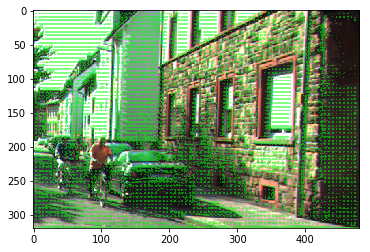

Accuracy :  0.12939233


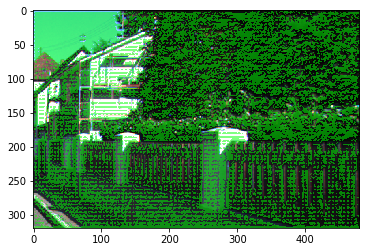

Accuracy :  0.007936258


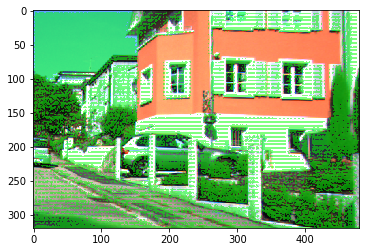

Accuracy :  0.106070235


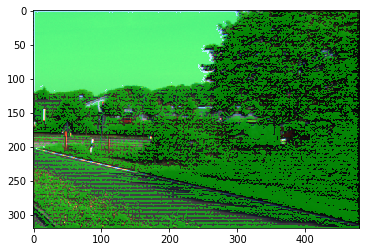

Accuracy :  0.0019729144


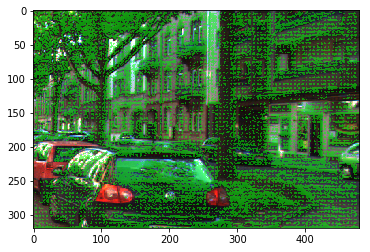

Accuracy :  0.013863453


In [13]:
tf.reset_default_graph()

model = UNetModel(config)
model.build()

with tf.Session() as sess:   
    sess.run(tf.global_variables_initializer())
    print("Loading final model ")
    tf.saved_model.loader.load(sess, [tf.saved_model.tag_constants.TRAINING], config.final_model_dir)
    print("Final model loaded") 
    test = [data.get_data_element("test_data",i) for i in range(5)]
    for item in test :
        img = item[0]
        mask = item[1]
        model.predict(sess,img,mask)